# Técnicas de Regressão para Predição de Valores de Imóveis 

Esse Kernel tem como objetivo aplicar o aprendizado em Regressão Linear utilizando o dataset da competição do Kaggle **House Prices: Advanced Regression Techniques.**

A primeira parte foi feita o tratamento dos dados junto com o tratamento de dados faltantes.

Na segunda parte foi realizada a análise exploratória das variáveis.

Na parte final temos a análise preditiva com alguns modelos de regressão.

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_565c7c21b9834a4f8155ca6b9274628e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='3fBDn00ya20uh7c_Ytfn6Y80F9-YHkJVpkGf0s7fAZm6',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_565c7c21b9834a4f8155ca6b9274628e.get_object(Bucket='housepricesregression-donotdelete-pr-fdymxflx3apqxm',Key='train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)



In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df_train = df_data_0.copy()
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.shape

(1460, 81)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Análise das variáveis numéricas

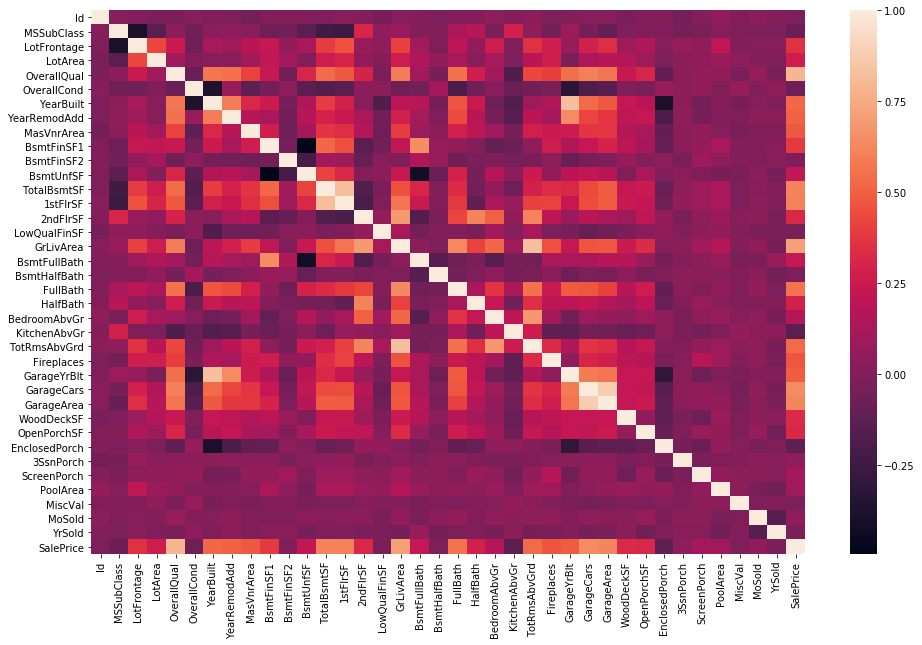

In [6]:
fig = plt.subplots(figsize = (16,10))
sns.heatmap(df_train.corr())

Analisando a variável SalePrice e considerando as variáveis com maiores correlações, acima de 0.5, temos GarageArea, GarageCars, GarageYrBlt, Fireplaces, TotRmsAbvGrd, Fullbath, GrLivArea, 1stFlrSF, TotalBsmtSF, MasVnrArea, YearRemodAdd, YearBuilt, OverallQual.

In [7]:
corr = df_train.corr()
corr.loc[corr['SalePrice'] >0.5]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
FullBath,0.005587,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.027239,0.040380,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431


Dentre essas variáveis existe uma alta correlação entre GarageArea, GarageCars, GarageYrBlt, portanto apenas a GarageCars será analisada. Outra forte correlação é entre as variáveis 1stFlrSF, TotalBsmtSF, sendo a segunda utilizada na predição. As variáveis TotRmsAbvGrd é fortemente correlacionado com GrLiv Area.

#### Correlação de Spearman

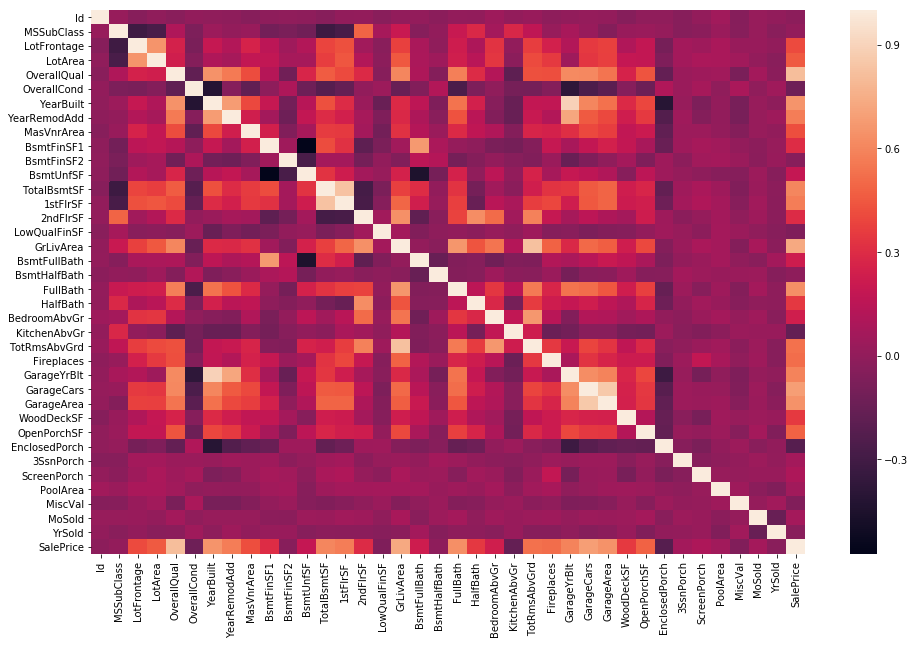

In [8]:
fig = plt.subplots(figsize = (16,10))
sns.heatmap(df_train.corr('spearman'))

In [8]:
corr = df_train.corr('spearman')
df_corr = corr.loc[corr['SalePrice'] >0.5]
df_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
OverallQual,-0.028771,0.108065,0.254952,0.233303,1.000000,-0.177521,0.647392,0.557723,0.413500,0.132957,...,0.259439,0.435046,-0.162434,0.032903,0.046335,0.056667,-0.088019,0.061455,-0.025464,0.809829
YearBuilt,-0.005130,0.035848,0.194510,0.103385,0.647392,-0.416964,1.000000,0.684388,0.402349,0.189645,...,0.287729,0.392691,-0.408622,0.022498,-0.073119,0.008986,-0.091786,0.018621,-0.014100,0.652682
YearRemodAdd,-0.011680,0.006802,0.116772,0.075158,0.557723,-0.041464,0.684388,1.000000,0.234333,0.063353,...,0.230241,0.353325,-0.235037,0.051694,-0.045808,0.002821,-0.090868,0.021081,0.045158,0.571159
TotalBsmtSF,-0.033187,-0.318897,0.386206,0.366197,0.459915,-0.217375,0.427187,0.299042,0.360104,0.410413,...,0.231045,0.270321,-0.171538,0.049173,0.088690,0.047067,-0.061180,0.030340,-0.016530,0.602725
1stFlrSF,-0.000616,-0.278318,0.427678,0.443858,0.408730,-0.166686,0.293363,0.240265,0.352351,0.323478,...,0.218999,0.234713,-0.129189,0.060195,0.107512,0.070557,-0.033219,0.053828,-0.022411,0.575408
GrLivArea,0.002812,0.203576,0.375844,0.449040,0.603262,-0.153720,0.288493,0.282400,0.322678,0.057471,...,0.227158,0.398312,-0.049057,0.033912,0.085630,0.068298,-0.048969,0.080705,-0.026256,0.731310
FullBath,0.007269,0.194912,0.220234,0.235377,0.576372,-0.262400,0.537420,0.431390,0.290366,0.011986,...,0.226374,0.370152,-0.159420,0.037323,-0.037236,0.042212,-0.048728,0.066774,-0.012144,0.635957
TotRmsAbvGrd,0.025888,0.165825,0.365999,0.405924,0.427806,-0.104919,0.176820,0.198243,0.263912,-0.050062,...,0.164980,0.285002,-0.028734,-0.002640,0.032286,0.059386,-0.021463,0.040138,-0.036894,0.532586
Fireplaces,-0.013644,0.019480,0.245315,0.350198,0.420626,-0.045383,0.174655,0.119270,0.255627,0.192264,...,0.213781,0.218727,-0.060932,0.035791,0.179235,0.083876,-0.007546,0.043514,-0.034962,0.519247
GarageYrBlt,-0.000194,0.079268,0.115694,0.041796,0.618193,-0.379398,0.890546,0.722377,0.305964,0.078935,...,0.274373,0.394185,-0.317438,0.016935,-0.099749,-0.007330,-0.067091,0.012337,-0.005770,0.593788


Na correlação utilizando o método de Spearman, temos a adição de duas novas variáveis que são GarageYrBlt e Fireplaces. Como existe uma alta correlação entre as variáveis de Garagem, ela será excluída da análise.  

### Dados Faltantes

In [9]:
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [10]:
#Função que retorna as colunas com mais de 20% de missing values.
#Em algumas variáveis existem valores representado pelo string Na que serão contabilizados com missing values.
def missing_values(threshold = 0.2):
    for i, column in zip(list(df_train.isnull().sum()), list(df_train.isnull().sum().keys())):
        if i/df_train.shape[0] > threshold:
            print(column)
    return     


In [11]:
missing_values()

Alley
FireplaceQu
PoolQC
Fence
MiscFeature


A coluna Alley tem como valor Na, representando a falta de acesso. O Ideal seria modificar por um string diferente. Já a coluna FireplaceQu também tem como valor Na representando nunhuma lareira na casa. As outras três colunas tem Na não como missing values. 

In [12]:
df_train['Alley'].fillna('NO', inplace = True)

In [13]:
df_train['FireplaceQu'].fillna('NO', inplace = True)

In [14]:
df_train['PoolQC'].fillna('NO', inplace = True)

In [15]:
df_train['Fence'].fillna('NO', inplace = True)

In [16]:
df_train['MiscFeature'].fillna('NO', inplace = True)

In [17]:
df_train['GarageCond'].fillna('NO', inplace = True)

In [18]:
df_train['GarageQual'].fillna('NO', inplace = True)

In [19]:
df_train['GarageFinish'].fillna('NO', inplace = True)

In [20]:
df_train['GarageType'].fillna('NO', inplace = True)

In [21]:
df_train['GarageYrBlt'].fillna(0.0, inplace = True)

In [22]:
df_train['LotFrontage'].fillna(0.0, inplace = True)

In [23]:
df_train['MasVnrType'].fillna('None', inplace = True)
df_train['MasVnrArea'].fillna(0.0, inplace = True)

In [25]:
df_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC      

In [25]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Análise gráfica das variáveis numéricas

In [20]:
df_corr['SalePrice'].sort_values(ascending = False)

SalePrice       1.000000
OverallQual     0.809829
GrLivArea       0.731310
GarageCars      0.690711
YearBuilt       0.652682
GarageArea      0.649379
FullBath        0.635957
GarageYrBlt     0.634095
TotalBsmtSF     0.602725
1stFlrSF        0.575408
YearRemodAdd    0.571159
TotRmsAbvGrd    0.532586
Fireplaces      0.519247
Name: SalePrice, dtype: float64

In [17]:
# Existe uma função do pandas para retirar variáveis númericas de um dataset. _get_numeric_data()
columns = df_corr.index.values.tolist()
columns

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice']

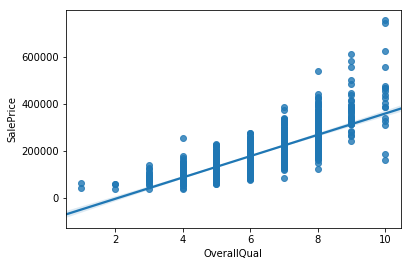

In [60]:
sns.regplot(x = 'OverallQual',
            y = 'SalePrice',
            data = df_train)


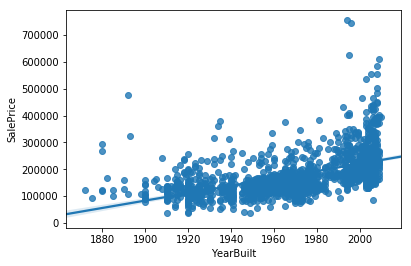

In [61]:
sns.regplot(x = 'YearBuilt',
            y = 'SalePrice',
            data = df_train)


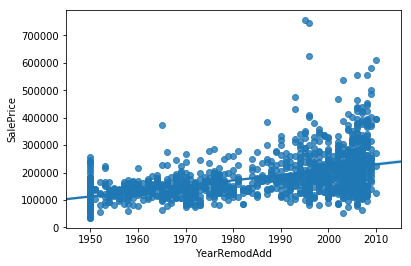

In [62]:
sns.regplot(x = 'YearRemodAdd',
            y = 'SalePrice',
            data = df_train)


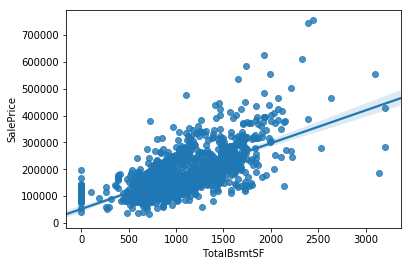

In [65]:
sns.regplot(x = 'TotalBsmtSF',
            y = 'SalePrice',
            data = df_train[df_train['TotalBsmtSF']< 5000]) #Existe um ponto outlier no valor de 6000  


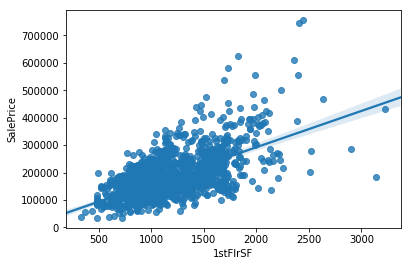

In [66]:
sns.regplot(x = '1stFlrSF',
            y = 'SalePrice',
            data = df_train[df_train['1stFlrSF']< 4000]) #Existe um ponto outlier no valor de 5000 


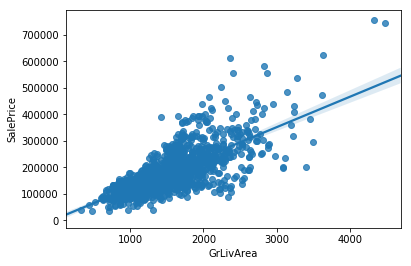

In [70]:
sns.regplot(x = 'GrLivArea',
            y = 'SalePrice',
            data = df_train[df_train['GrLivArea'] < 4600]) #Existem dois pontos outliers acima de 4600


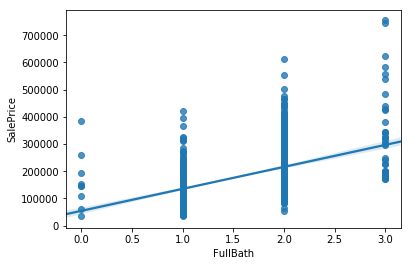

In [71]:
sns.regplot(x = 'FullBath',
            y = 'SalePrice',
            data = df_train)


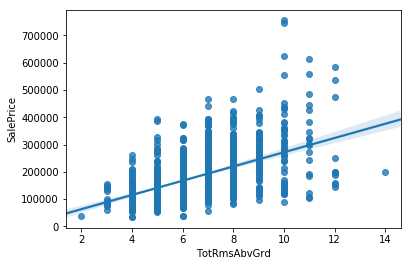

In [72]:
sns.regplot(x = 'TotRmsAbvGrd',
            y = 'SalePrice',
            data = df_train)


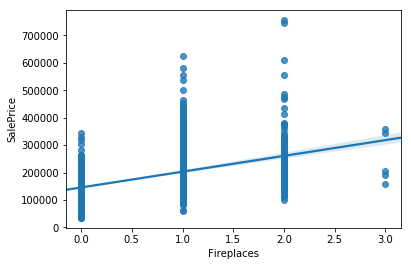

In [73]:
sns.regplot(x = 'Fireplaces',
            y = 'SalePrice',
            data = df_train)


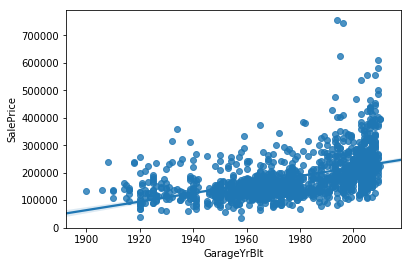

In [74]:
sns.regplot(x = 'GarageYrBlt',
            y = 'SalePrice',
            data = df_train)


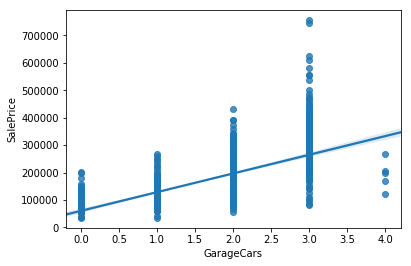

In [75]:
sns.regplot(x = 'GarageCars',
            y = 'SalePrice',
            data = df_train)


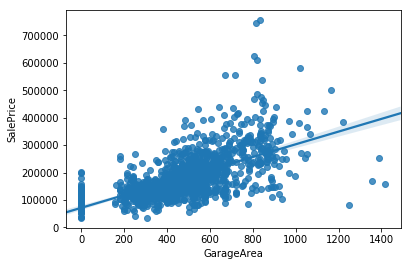

In [78]:
sns.regplot(x = 'GarageArea',
            y = 'SalePrice',
            data = df_train)


### Análise gráfica das variáveis categóricas                 

In [26]:
#Pacote para análises estatísticas
from scipy import stats

In [27]:
# Separando as variáveis categóricas
var_cat = []
for col, i in zip(df_train.dtypes.keys(), df_train.dtypes):
    if i == 'object':
        var_cat.append(col)
var_cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [28]:
df_cat = df_train[var_cat]
df_cat.nunique()

MSZoning          5
Street            2
Alley             3
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
PoolQC            4
Fence             5
MiscFeature       5
SaleType          9
SaleCondition     6
dtype: int64

In [25]:
for col in df_cat.columns.values:
    print(col)
    print(df_train[col].value_counts())
    print(" ")

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
 
Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
 
Alley
NO      1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
 
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
 
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
 
Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
 
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
 
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
 
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       

In [84]:
df_Ht = df_train.loc[:, ['Neighborhood', 'SalePrice']]
df_Ht = df_Ht.set_index('Neighborhood')

In [85]:
f_test, p_value = stats.f_oneway(df_Ht.loc['NAmes'],
                                 df_Ht.loc['CollgCr'],
                                 df_Ht.loc['OldTown'],
                                 df_Ht.loc['Edwards'],
                                 df_Ht.loc['Somerst'],
                                 df_Ht.loc['Gilbert'],
                                 df_Ht.loc['NridgHt'],
                                 df_Ht.loc['Sawyer'],
                                 df_Ht.loc['NWAmes'],
                                 df_Ht.loc['SawyerW'],
                                 df_Ht.loc['BrkSide'],
                                 df_Ht.loc['Crawfor'],
                                 df_Ht.loc['Mitchel'],
                                 df_Ht.loc['NoRidge'],
                                 df_Ht.loc['Timber'],
                                 df_Ht.loc['IDOTRR'],
                                 df_Ht.loc['ClearCr'],
                                 df_Ht.loc['StoneBr'],
                                 df_Ht.loc['SWISU'],
                                 df_Ht.loc['Blmngtn'],
                                 df_Ht.loc['MeadowV'],
                                 df_Ht.loc['BrDale'],
                                 df_Ht.loc['Veenker'],
                                 df_Ht.loc['NPkVill'],
                                 df_Ht.loc['Blueste']
                                
                                 )


print("F test:", f_test, "p value:", p_value )

F test: [71.78486512] p value: [1.55860028e-225]


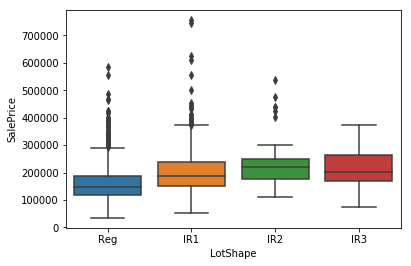

In [133]:
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = df_train)

In [69]:
df_LS = df_train.loc[:, ['LotShape', 'SalePrice']]
df_LS = df_LS.set_index('LotShape')

In [70]:
f_test, p_value = stats.f_oneway(df_LS.loc['Reg'],
                                 df_LS.loc['IR1'],
                                 df_LS.loc['IR2'],
                                 df_LS.loc['IR3'],
                                 )


print("F test:", f_test, "p value:", p_value )

F test: [40.13285166] p value: [6.44752385e-25]


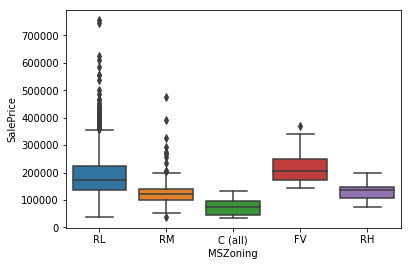

In [138]:
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = df_train)

In [65]:
df_MSZ = df_train.loc[:, ['MSZoning', 'SalePrice']]
df_MSZ = df_MSZ.set_index('MSZoning')

In [67]:
f_test, p_value = stats.f_oneway(df_MSZ.loc['RL'],
                                 df_MSZ.loc['RM'],
                                 df_MSZ.loc['C (all)'],
                                 df_MSZ.loc['FV'],
                                 df_MSZ.loc['RH'],
                                 )


print("F test:", f_test, "p value:", p_value )

F test: [43.84028167] p value: [8.81763387e-35]


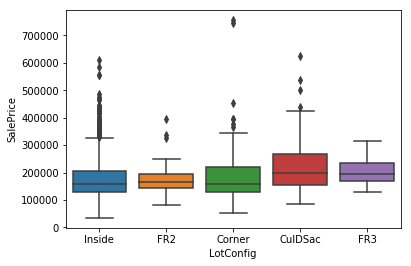

In [140]:
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = df_train)

In [63]:
df_LC = df_train.loc[:, ['LotConfig', 'SalePrice']]
df_LC = df_LC.set_index('LotConfig')

In [64]:
f_test, p_value = stats.f_oneway(df_LC.loc['Inside'],
                                 df_LC.loc['FR2'],
                                 df_LC.loc['Corner'],
                                 df_LC.loc['CulDSac'],
                                 df_LC.loc['FR3'],
                                 )


print("F test:", f_test, "p value:", p_value )

F test: [7.80995412] p value: [3.16316747e-06]


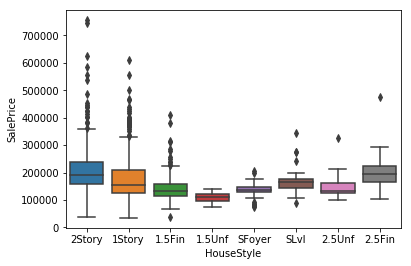

In [141]:
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = df_train)

In [59]:
df_HS = df_train.loc[:, ['HouseStyle', 'SalePrice']]
df_HS = df_HS.set_index('HouseStyle')

In [60]:
f_test, p_value = stats.f_oneway(df_HS.loc['2Story'],
                                 df_HS.loc['1Story'],
                                 df_HS.loc['1.5Fin'],
                                 df_HS.loc['1.5Unf'],
                                 df_HS.loc['SFoyer'],
                                 df_HS.loc['SLvl'],
                                 df_HS.loc['2.5Unf'],
                                 df_HS.loc['2.5Fin']
                                 )


print("F test:", f_test, "p value:", p_value )

F test: [19.595001] p value: [3.37677654e-25]


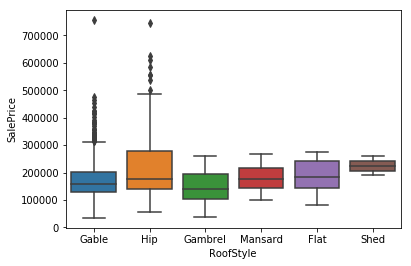

In [142]:
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = df_train)

In [57]:
df_RS = df_train.loc[:, ['RoofStyle', 'SalePrice']]
df_RS = df_RS.set_index('RoofStyle')

In [58]:
f_test, p_value = stats.f_oneway(df_RS.loc['Gable'],
                                 df_RS.loc['Hip'],
                                 df_RS.loc['Gambrel'],
                                 df_RS.loc['Mansard'],
                                 df_RS.loc['Flat'],
                                 df_RS.loc['Shed']
                                 )


print("F test:", f_test, "p value:", p_value )

F test: [17.80549723] p value: [3.65352305e-17]


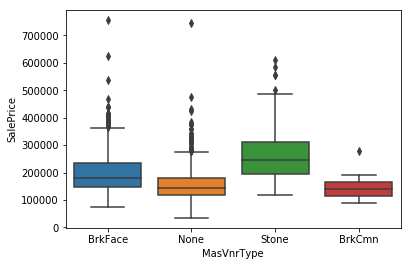

In [143]:
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = df_train)

In [55]:
df_MVT = df_train.loc[:, ['MasVnrType', 'SalePrice']]
df_MVT = df_MVT.set_index('MasVnrType')

In [56]:
f_test, p_value = stats.f_oneway(df_MVT.loc['BrkFace'],
                                 df_MVT.loc['None'],
                                 df_MVT.loc['Stone'],
                                 df_MVT.loc['BrkCmn'],
                                 )


print("F test:", f_test, "p value:", p_value )

F test: [111.67238009] p value: [4.79333118e-65]


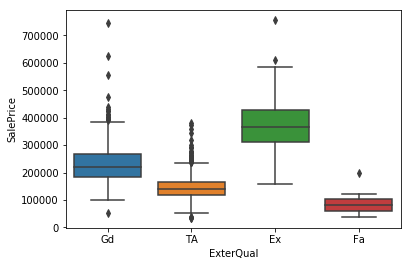

In [144]:
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = df_train)

In [53]:
df_EQ = df_train.loc[:, ['ExterQual', 'SalePrice']]
df_EQ = df_EQ.set_index('ExterQual')

In [54]:
f_test, p_value = stats.f_oneway(df_EQ.loc['Gd'],
                                 df_EQ.loc['TA'],
                                 df_EQ.loc['Ex'],
                                 df_EQ.loc['Fa'],
                                 )


print("F test:", f_test, "p value:", p_value )

F test: [443.33483142] p value: [1.4395511e-204]


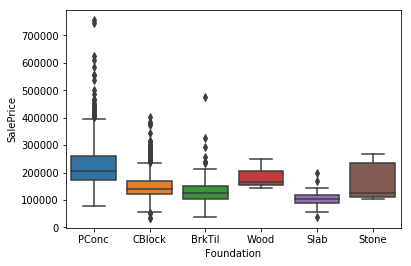

In [147]:
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = df_train)

In [50]:
df_F = df_train.loc[:, ['Foundation', 'SalePrice']]
df_F = df_F.set_index('Foundation')

In [51]:
f_test, p_value = stats.f_oneway(df_F.loc['PConc'],
                                 df_F.loc['CBlock'],
                                 df_F.loc['BrkTil'],
                                 df_F.loc['Wood'],
                                 df_F.loc['Slab'],
                                 df_F.loc['Stone']
                                 )


print("F test:", f_test, "p value:", p_value )

F test: [100.25385059] p value: [5.791895e-91]


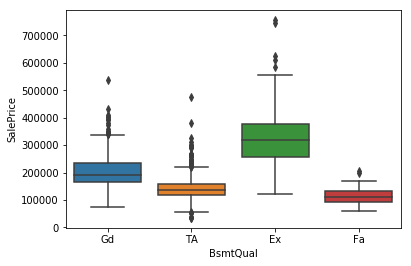

In [148]:
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = df_train)

In [48]:
df_BQ = df_train.loc[:, ['BsmtQual', 'SalePrice']]
df_BQ = df_BQ.set_index('BsmtQual')

In [49]:
f_test, p_value = stats.f_oneway(df_BQ.loc['TA'],
                                 df_BQ.loc['Ex'],
                                 df_BQ.loc['Gd'],
                                 df_BQ.loc['Fa'],
                                 )


print("F test:", f_test, "p value:", p_value )

F test: [392.91350647] p value: [9.61061511e-186]


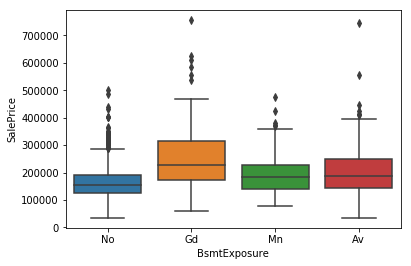

In [149]:
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = df_train)

In [44]:
df_BE = df_train.loc[:, ['BsmtExposure', 'SalePrice']]
df_BE = df_BE.set_index('BsmtExposure')

In [46]:
f_test, p_value = stats.f_oneway(df_BE.loc['Av'],
                                 df_BE.loc['Mn'],
                                 df_BE.loc['Gd'],
                                 df_BE.loc['No'],
                                 )


print("F test:", f_test, "p value:", p_value )

F test: [70.88798365] p value: [1.02267063e-42]


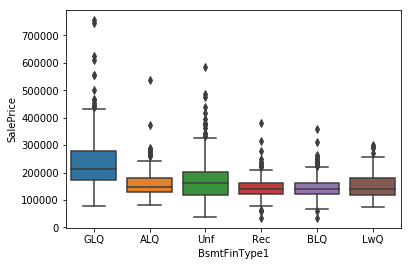

In [150]:
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = df_train)

In [42]:
df_BFT = df_train.loc[:, ['BsmtFinType1', 'SalePrice']]
df_BFT = df_BFT.set_index('BsmtFinType1')

In [43]:
f_test, p_value = stats.f_oneway(df_BFT.loc['GLQ'],
                                 df_BFT.loc['ALQ'],
                                 df_BFT.loc['Unf'],
                                 df_BFT.loc['Rec'],
                                 df_BFT.loc['BLQ'],
                                 df_BFT.loc['LwQ']
                                )


print("F test:", f_test, "p value:", p_value )

F test: [67.60217484] p value: [1.80773101e-63]


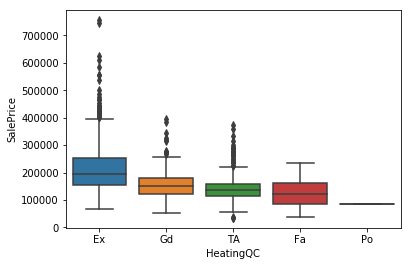

In [151]:
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = df_train)

In [38]:
df_HQC = df_train.loc[:, ['HeatingQC', 'SalePrice']]
df_HQC = df_HQC.set_index('HeatingQC')

In [40]:
f_test, p_value = stats.f_oneway(df_HQC.loc['TA'],
                                 df_HQC.loc['Gd'],
                                 df_HQC.loc['Fa'],
                                 df_HQC.loc['Ex']
                                )


print("F test:", f_test, "p value:", p_value )

F test: [117.28134683] p value: [5.0417287e-68]


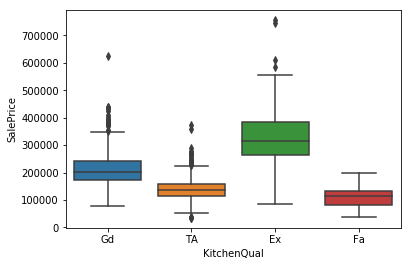

In [152]:
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = df_train)

In [36]:
df_KQ = df_train.loc[:, ['KitchenQual', 'SalePrice']]
df_KQ = df_KQ.set_index('KitchenQual')

In [37]:
f_test, p_value = stats.f_oneway(df_KQ.loc['TA'],
                                 df_KQ.loc['Gd'],
                                 df_KQ.loc['Fa'],
                                 df_KQ.loc['Ex']                                 
                                )


print("F test:", f_test, "p value:", p_value )

F test: [407.80635156] p value: [3.03221275e-192]


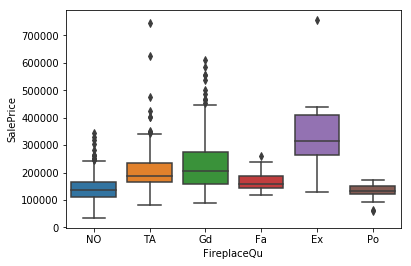

In [153]:
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = df_train)

In [33]:
df_FQ = df_train.loc[:, ['FireplaceQu', 'SalePrice']]
df_FQ = df_FQ.set_index('FireplaceQu')

In [35]:
f_test, p_value = stats.f_oneway(df_FQ.loc['TA'],
                                 df_FQ.loc['Gd'],
                                 df_FQ.loc['Fa'],
                                 df_FQ.loc['NO'],
                                 df_FQ.loc['Ex'],
                                 df_FQ.loc['Po']
                                )


print("F test:", f_test, "p value:", p_value )

F test: [121.07512127] p value: [2.97121697e-107]


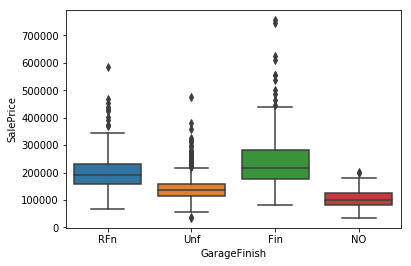

In [154]:
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = df_train)

In [26]:
df_GF = df_train.loc[:, ['GarageFinish', 'SalePrice']]
df_GF = df_GF.set_index('GarageFinish')

In [27]:
f_test, p_value = stats.f_oneway(df_GF.loc['RFn'],
                                 df_GF.loc['Unf'],
                                 df_GF.loc['Fin'],
                                 df_GF.loc['NO']
                                )


print("F test:", f_test, "p value:", p_value )

F test: [213.86702758] p value: [6.22874718e-115]


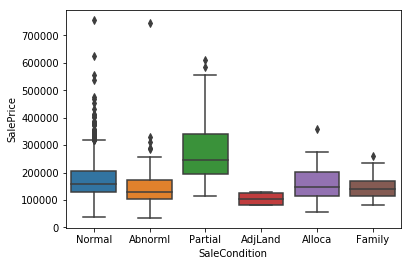

In [155]:
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = df_train)

In [29]:
df_SC = df_train.loc[:, ['SaleCondition', 'SalePrice']]
df_SC = df_SC.set_index('SaleCondition')


In [30]:
f_test, p_value = stats.f_oneway(df_SC.loc['Abnorml'],
                                 df_SC.loc['AdjLand'],
                                 df_SC.loc['Alloca'],
                                 df_SC.loc['Family'],
                                 df_SC.loc['Normal'],
                                 df_SC.loc['Partial'])


print("F test:", f_test, "p value:", p_value )

F test: [45.57842831] p value: [7.9882684e-44]


As variáveis selecionadas depois da análise da ANOVA foram as seguintes, GarageFinish, FireplaceQu, KitchenQual, HeatingQC, BsmtQual, Foundation, ExterQual, MasVnrType. 

### Feature Selection

Nessa seção vamos utilizar dois métodos diferentes para fazer a seleção dos dez melhores features e fazer a comparação com os features selecionados pela EDA. 


<ol>
<li>O Primeiro método do Univariate Selection é o f_regression;</li>
<li>O Segundo método do Univariate Selection é o mutual information;</li>
</ol>

*Univariate Selection - f_regression*

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


In [25]:
df_num = df_train[df_train.corr().columns.values]
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [26]:
X = df_num.iloc[:,1:37]
Y = df_num.iloc[:,-1]

In [27]:
#Aplicando o método de SelectKbest para selecionar as 15 melhores variáveis
Mvar = SelectKBest(score_func= f_regression, k = 15)
fit = Mvar.fit(X,Y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)


In [28]:
#Concatenando dois dataframes para melhor visualização
featureScores = pd.concat([df_scores, df_columns], axis = 1)
featureScores.columns = ['Scores', 'Specs']
print(featureScores.nlargest(15, 'Scores'))

         Scores         Specs
3   2436.770591   OverallQual
15  1470.585010     GrLivArea
25  1013.705666    GarageCars
26   926.951287    GarageArea
11   880.341282   TotalBsmtSF
12   845.524488      1stFlrSF
18   668.430296      FullBath
22   580.762801  TotRmsAbvGrd
5    548.665821     YearBuilt
6    504.714855  YearRemodAdd
7    419.328468    MasVnrArea
23   406.503866    Fireplaces
8    255.923517    BsmtFinSF1
27   171.494673    WoodDeckSF
13   165.561151      2ndFlrSF


In [29]:
featureScores.set_index('Specs', inplace = True)

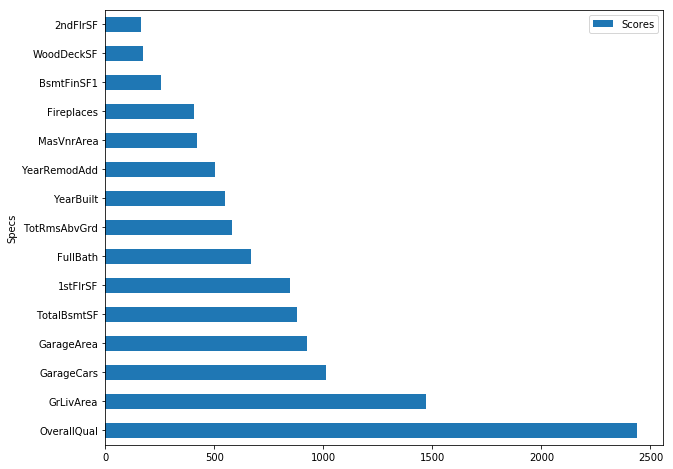

In [30]:
featureScores.nlargest(15, 'Scores').plot(kind = 'barh',
                                          figsize = (10,8))

plt.show()

*Univariate Selection - mutual_info_regression*

In [31]:
from sklearn.feature_selection import mutual_info_regression

In [32]:
X = df_num.iloc[:,1:37]
Y = df_num.iloc[:,-1]

In [33]:
#Aplicando o método de SelectKbest com Mutual Information para selecionar as 15 melhores variáveis
MIvar = SelectKBest(score_func= mutual_info_regression, k = 15)
fit = MIvar.fit(X,Y)
df_MI = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [34]:
#Concatenando dois dataframes para melhor visualização
MIScores = pd.concat([df_MI, df_columns], axis = 1)
MIScores.columns = ['Scores', 'Specs']
print(MIScores.nlargest(15, 'Scores'))

      Scores         Specs
3   0.564367   OverallQual
15  0.482525     GrLivArea
5   0.365519     YearBuilt
11  0.365100   TotalBsmtSF
25  0.363644    GarageCars
26  0.361953    GarageArea
12  0.307372      1stFlrSF
0   0.272259    MSSubClass
18  0.270185      FullBath
24  0.255421   GarageYrBlt
6   0.249468  YearRemodAdd
22  0.216758  TotRmsAbvGrd
1   0.208116   LotFrontage
13  0.200507      2ndFlrSF
23  0.176416    Fireplaces


In [35]:
MIScores.set_index('Specs', inplace = True)

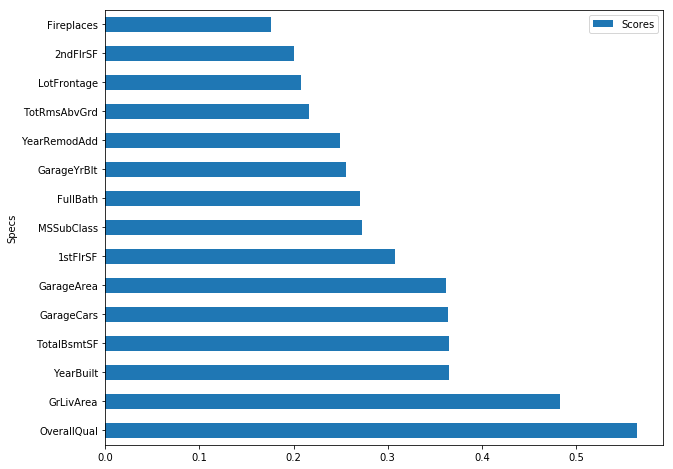

In [36]:
MIScores.nlargest(15, 'Scores').plot(kind = 'barh',
                                     figsize = (10,8))

plt.show()

### One Hot Enconding

In [29]:
#One Hot enconding para utilização das variáveis categóricas nos modelos de predição
columns = ['GarageFinish', 'FireplaceQu', 'KitchenQual', 'HeatingQC', 'BsmtQual', 'Foundation', 'ExterQual', 'MasVnrType']
for i in columns:
    print(i)
    print(df_train[i].value_counts())
    print(" ")

GarageFinish
Unf    605
RFn    422
Fin    352
NO      81
Name: GarageFinish, dtype: int64
 
FireplaceQu
NO    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
 
KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
 
HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
 
BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
 
Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64
 
ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
 
MasVnrType
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
 


In [30]:
df_one = df_train[columns]

In [31]:
df_M1 = df_one.loc[:,'MasVnrType'] 
df_M1.replace('None', 1, inplace = True)
df_M1.replace('BrkFace', 2, inplace = True)
df_M1.replace('Stone', 3, inplace = True)
df_M1.replace('BrkCmn', 4, inplace = True)
df_M1.value_counts()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


1    872
2    445
3    128
4     15
Name: MasVnrType, dtype: int64

In [32]:
df_M2 = df_one.loc[:,'ExterQual'] 
df_M2.replace('TA', 1, inplace = True)
df_M2.replace('Gd', 2, inplace = True)
df_M2.replace('Ex', 3, inplace = True)
df_M2.replace('Fa', 4, inplace = True)
df_M2.value_counts()

1    906
2    488
3     52
4     14
Name: ExterQual, dtype: int64

In [33]:
df_M3 = df_one.loc[:,'Foundation'] 
df_M3.replace('PConc', 1, inplace = True)
df_M3.replace('CBlock', 2, inplace = True)
df_M3.replace('BrkTil', 3, inplace = True)
df_M3.replace('Slab', 4, inplace = True)
df_M3.replace('Stone', 5, inplace = True)
df_M3.replace('Wood', 6, inplace = True)
df_M3.value_counts()

1    647
2    634
3    146
4     24
5      6
6      3
Name: Foundation, dtype: int64

In [34]:
df_M4 = df_one.loc[:,'BsmtQual'] 
df_M4.replace('TA', 1, inplace = True)
df_M4.replace('Gd', 2, inplace = True)
df_M4.replace('Ex', 3, inplace = True)
df_M4.replace('Fa', 4, inplace = True)
df_M4.value_counts()

1.0    649
2.0    618
3.0    121
4.0     35
Name: BsmtQual, dtype: int64

In [35]:
df_M5 = df_one.loc[:,'HeatingQC'] 
df_M5.replace('TA', 1, inplace = True)
df_M5.replace('Gd', 2, inplace = True)
df_M5.replace('Ex', 3, inplace = True)
df_M5.replace('Fa', 4, inplace = True)
df_M5.replace('Po', 5, inplace = True)
df_M5.value_counts()

3    741
1    428
2    241
4     49
5      1
Name: HeatingQC, dtype: int64

In [36]:
df_M6 = df_one.loc[:,'KitchenQual'] 
df_M6.replace('TA', 1, inplace = True)
df_M6.replace('Gd', 2, inplace = True)
df_M6.replace('Ex', 3, inplace = True)
df_M6.replace('Fa', 4, inplace = True)
df_M6.value_counts()

1    735
2    586
3    100
4     39
Name: KitchenQual, dtype: int64

In [37]:
df_M7 = df_one.loc[:,'FireplaceQu'] 
df_M7.replace('TA', 1, inplace = True)
df_M7.replace('Gd', 2, inplace = True)
df_M7.replace('Ex', 3, inplace = True)
df_M7.replace('Fa', 4, inplace = True)
df_M7.replace('Po', 5, inplace = True)
df_M7.replace('NO', 6, inplace = True)
df_M7.value_counts()

6    690
2    380
1    313
4     33
3     24
5     20
Name: FireplaceQu, dtype: int64

In [38]:
df_M8 = df_one.loc[:,'GarageFinish'] 
df_M8.replace('Unf', 1, inplace = True)
df_M8.replace('RFn', 2, inplace = True)
df_M8.replace('Fin', 3, inplace = True)
df_M8.replace('NO', 4, inplace = True)
df_M8.value_counts()

1    605
2    422
3    352
4     81
Name: GarageFinish, dtype: int64

In [39]:
df_cat_one = pd.DataFrame({'MasVnrType':df_M1,
                            'ExterQual':df_M2,
                            'Foundation':df_M3,
                            'BsmtQual':df_M4,
                            'HeatingQC':df_M5,
                            'KitchenQual':df_M6,
                            'FireplaceQu':df_M7,
                            'GarageFinish':df_M8})


In [40]:
df_cat_one.head()

,MasVnrType,ExterQual,Foundation,BsmtQual,HeatingQC,KitchenQual,FireplaceQu,GarageFinish
0,2,2,1,2.0,3,2,6,2
1,1,1,2,2.0,3,1,1,2
2,2,2,1,2.0,3,2,1,2
3,1,1,3,1.0,2,2,2,1
4,2,2,1,2.0,3,2,1,2


In [41]:
new_x = x_data.join(df_cat_one, how = 'inner')
new_x.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,Fireplaces,GarageCars,MasVnrType,ExterQual,Foundation,BsmtQual,HeatingQC,KitchenQual,FireplaceQu,GarageFinish
0,7,2003,856,1710,2,0,2,2,2,1,2.0,3,2,6,2
1,6,1976,1262,1262,2,1,2,1,1,2,2.0,3,1,1,2
2,7,2001,920,1786,2,1,2,2,2,1,2.0,3,2,1,2
3,7,1915,756,1717,1,1,3,1,1,3,1.0,2,2,2,1
4,8,2000,1145,2198,2,1,3,2,2,1,2.0,3,2,1,2


In [42]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NO,Reg,Lvl,AllPub,...,0,NO,NO,NO,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NO,Reg,Lvl,AllPub,...,0,NO,NO,NO,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NO,IR1,Lvl,AllPub,...,0,NO,NO,NO,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NO,IR1,Lvl,AllPub,...,0,NO,NO,NO,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NO,IR1,Lvl,AllPub,...,0,NO,NO,NO,0,12,2008,WD,Normal,250000


### Regressão Linear Multivariável

In [26]:
# Separando os variáveis dependentes da variável alvo
x_data = df_train[['OverallQual',
                   'YearBuilt',
                   'TotalBsmtSF',
                   'GrLivArea',
                   'FullBath',
                   'Fireplaces',
                   'GarageCars']]

y_data = df_train.iloc[:,-1]

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [54]:
# Fazendo o holdup dos dados com sklearn
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.20, random_state = 5)

In [55]:
print("X train:", x_train.shape[0])
print("X test:", x_test.shape[0])

X train: 1168
X test: 292


In [56]:
print("Y train:", y_train.shape[0])
print("Y test:", y_test.shape[0])

Y train: 1168
Y test: 292


In [57]:
#Criando a instância e treinando o modelo linear multivariável
MLR = LinearRegression()
MLR.fit(x_train, y_train)
df_coef = MLR.coef_
df_intercept = MLR.intercept_

In [58]:
#Os parâmetros do modelo
print(df_coef)
print(df_intercept)

[20362.04659706   317.92654354    26.51940489    42.65941944
 -1580.05607621 10319.90496031 15830.18823624]
-694487.5959635741


In [59]:
#Predizendo o modelo com dados de treino
Yhat_MLR_train = MLR.predict(x_train)

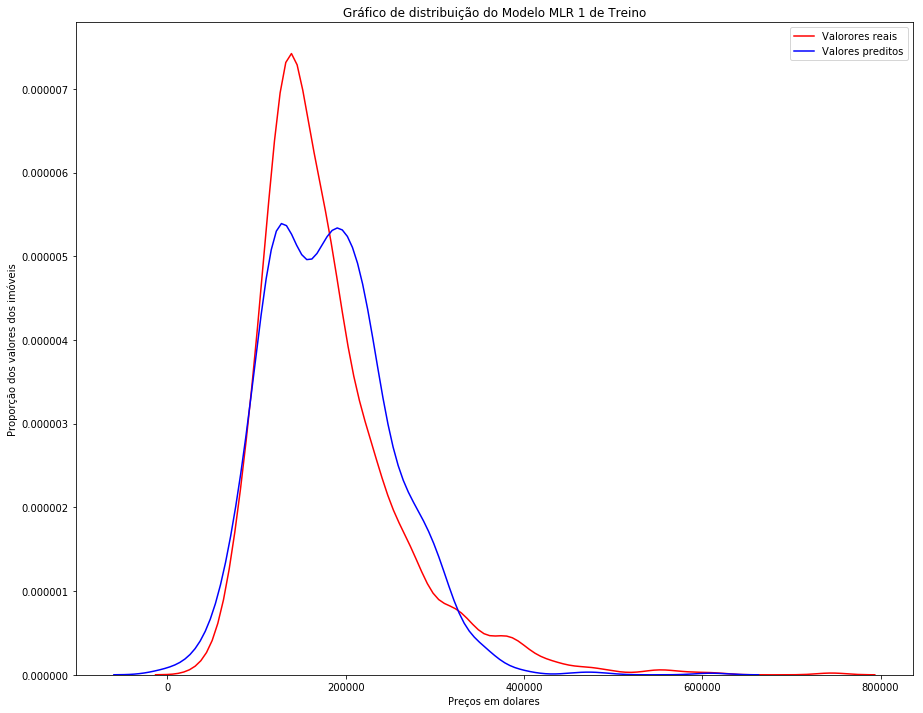

In [60]:
#Gráfico de distribuição de dados de treino
fig = plt.figure(figsize =  (15, 12))
ax1 = sns.distplot(y_train, hist = False, color = 'r', label = "Valorores reais")
ax2 = sns.distplot(Yhat_MLR_train, hist = False, color = 'b', label = "Valores preditos", ax = ax1)

plt.title("Gráfico de distribuição do Modelo MLR 1 de Treino")
plt.xlabel("Preços em dolares")
plt.ylabel("Proporção dos valores dos imóveis")

plt.show()
plt.close()

In [61]:
#Predizendo o modelo com dados de teste
Yhat_MLR = MLR.predict(x_test)

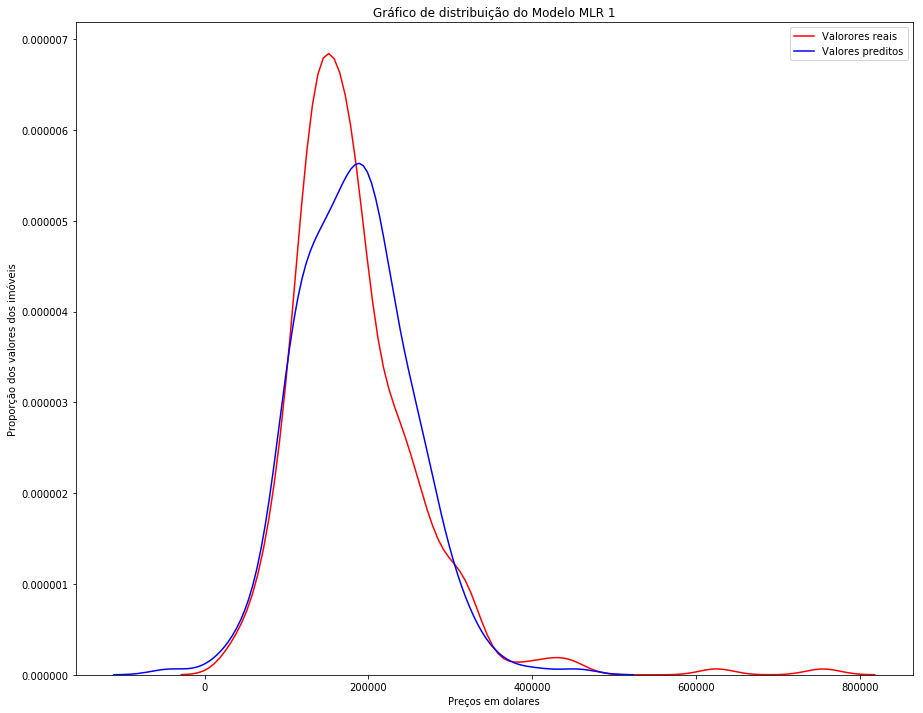

In [62]:
#Gráfico de distribuição de dados de teste
fig = plt.figure(figsize =  (15, 12))
ax1 = sns.distplot(y_test, hist = False, color = 'r', label = "Valorores reais")
ax2 = sns.distplot(Yhat_MLR, hist = False, color = 'b', label = "Valores preditos", ax = ax1)

plt.title("Gráfico de distribuição do Modelo MLR 1")
plt.xlabel("Preços em dolares")
plt.ylabel("Proporção dos valores dos imóveis")

plt.show()
plt.close()

In [63]:
#Calculando o erro médio quadratico do modelo
mean_squared_error(y_test, Yhat_MLR)

1256674367.257975

In [64]:
#Calculando o rmse do modelo, que é a raiz quadrática do MSE
rmse = np.sqrt(mean_squared_error(y_test,Yhat_MLR))
rmse

35449.6032031104

In [65]:
print("O R^2 do modelo de regressão multi linear é:", MLR.score(x_train, y_train))

O R^2 do modelo de regressão multi linear é: 0.7624405601342614


In [66]:
print("O R^2 do modelo de regressão multi linear é:", MLR.score(x_test, y_test))

O R^2 do modelo de regressão multi linear é: 0.8063677828092835


De acordo com o gráfico e com as metricas de avaliação, R^2 e MSE, nota se que o modelo não adequa-se bem com os valores reais. 

O modelo não conseque predizer os valores dos imóveis acima de 500.000 dolares. 

Na avaliação o Mean Squared error deu 1256674367.26 e o R^2 mostra que a variação dos valores dos imóveis é explicado apenas por 80,64% do modelo.   

In [43]:
#Fazendo ajustes no dataset com as variáveis categóricas
new_x['BsmtQual'] = new_x['BsmtQual'].fillna(1)

**Criando modelo de regressão levando em consideração as variáveis categóricas.**

In [44]:
# Fazendo o holdup dos dados com sklearn
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(new_x, y_data, test_size = 0.20, random_state = 9)

# criando o modelo com as variáveis categóricas
MLR2 = LinearRegression(normalize=True)
MLR2.fit(x_train_2, y_train_2)
df_coef = MLR2.coef_
df_intercept = MLR2.intercept_

print(df_coef)
print(df_intercept)

[14995.61445251   239.77047545    20.51893121    43.99880226
 -4434.91783893 15068.53532012 17049.00987486  1477.88318859
  7291.03924774  -515.43361193  5081.93669842  1442.2785427
  8145.69725969  1670.78786346  4537.14597114]
-556090.4916415358


In [45]:
#Com o modelo treinado, faz-se a predição com os dados de testes e de treino para analisar a variação, bem como o vies do modelo
yhat2_train = MLR2.predict(x_train_2)
yhat2 = MLR2.predict(x_test_2)

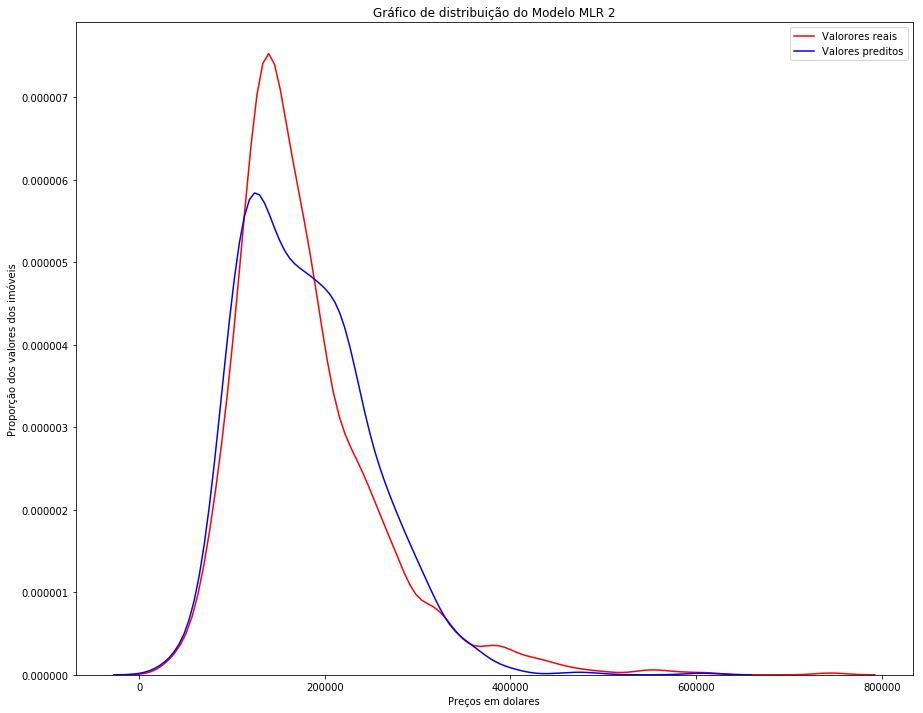

In [70]:
#Gráfico de distribuição de dados de treino
fig = plt.figure(figsize =  (15, 12))
ax1 = sns.distplot(y_train_2, hist = False, color = 'r', label = "Valorores reais")
ax2 = sns.distplot(yhat2_train, hist = False, color = 'b', label = "Valores preditos", ax = ax1)

plt.title("Gráfico de distribuição do Modelo MLR 2")
plt.xlabel("Preços em dolares")
plt.ylabel("Proporção dos valores dos imóveis")

plt.show()
plt.close()

In [71]:
print("O R^2 do modelo de regressão multi linear é:", MLR2.score(x_train_2, y_train_2))

O R^2 do modelo de regressão multi linear é: 0.7805080765900176


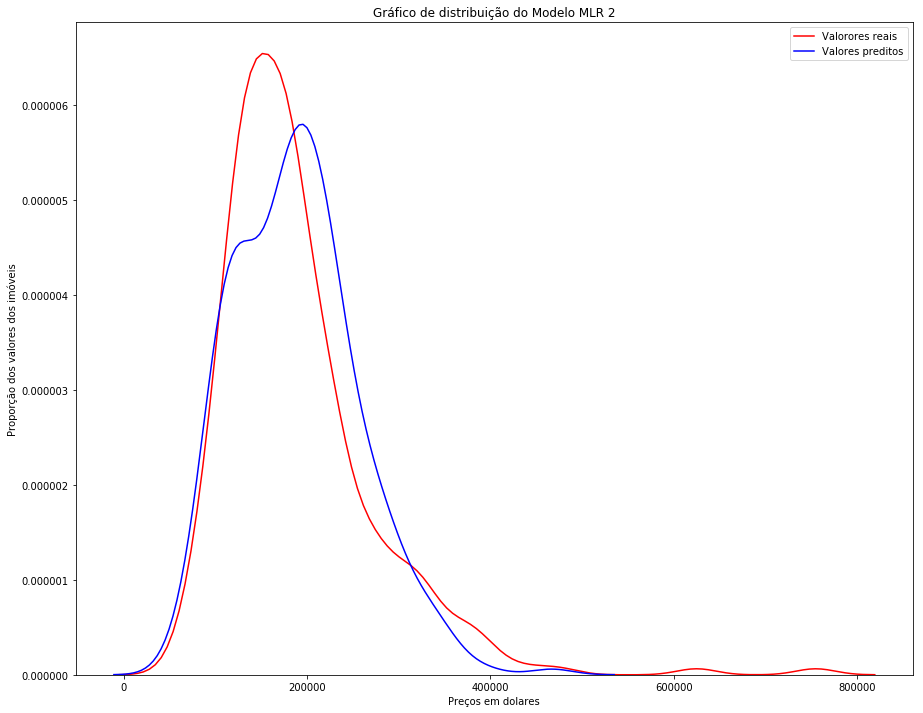

In [72]:
#Gráfico de distribuição de dados de teste
fig = plt.figure(figsize =  (15, 12))
ax1 = sns.distplot(y_test_2, hist = False, color = 'r', label = "Valorores reais")
ax2 = sns.distplot(yhat2, hist = False, color = 'b', label = "Valores preditos", ax = ax1)

plt.title("Gráfico de distribuição do Modelo MLR 2")
plt.xlabel("Preços em dolares")
plt.ylabel("Proporção dos valores dos imóveis")

plt.show()
plt.close()

In [73]:
print("O R^2 do modelo de regressão multi linear é:", MLR2.score(x_test_2, y_test_2))

O R^2 do modelo de regressão multi linear é: 0.8120374694574864


In [74]:
rmse = np.sqrt(mean_squared_error(y_test_2,yhat2))
rmse

36117.048166030385

Fazendo um comparativo entre a variância do primeiro modelo que utiliza apenas as variáveis numéricas, temos que ao adicionar esses novos elementos ao novo modelo há uma leve melhora no treinamento do modelo. Essas novas variáveis elas devem ter aumentado o entendimento do modelo em relação aos valores mais próximos do pico, porém foram adicionadas oito novas variáveis, aumentando o número de ruídos no modelo, isso pode explicar porque o modelo não teve uma grande melhora. 

A Adição das variáveis categoricas resultou em uma leve melhora no treinamento do modelo, já na generelização,houve uma melhor leitura do pico próximo dos valores de R$ 200.000,00. 

O próximo passo para melhorar o modelo seria o estudo se a diminuição da quantidade de variáveis afetara a acurácia do modelo. Portanto foi feita uma nova seleção dessas variáveis utilizando o SelectKBest com f_regression.

In [87]:
# Realizando o feature selection novamente com o dataset mais completo
# Selecionando os cinco melhores features e o f_regression
Mvar = SelectKBest(score_func= f_regression, k = 5)
fit = Mvar.fit(new_x, y_data)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(new_x.columns)

# Construindo a tabela de visualização 
featureScores = pd.concat([df_scores, df_columns], axis = 1)
featureScores.columns = ['Scores', 'Specs']
print(featureScores.nlargest(5, 'Scores'))


        Scores        Specs
0  2436.770591  OverallQual
3  1470.585010    GrLivArea
6  1013.705666   GarageCars
2   880.341282  TotalBsmtSF
8   691.105807    ExterQual


In [89]:
featureScores.set_index('Specs', inplace = True)

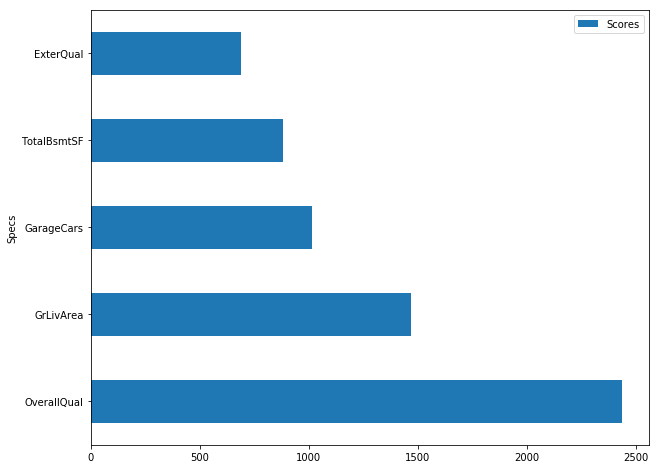

In [90]:
featureScores.nlargest(5, 'Scores').plot(kind = 'barh',
                                          figsize = (10,8))

plt.show()

In [118]:
# Novo modelo 
x_new= list(featureScores.sort_values(by='Scores', ascending =False).index[:5].values)
x_mod = new_x[x_new]

#Separando os dados e treinando o novo modelo
x_train, x_test, y_train, y_test = train_test_split(x_mod, y_data, test_size =0.2, random_state=9)
reg = LinearRegression(normalize=True)
reg.fit(x_train,y_train)
df_coef = reg.coef_
df_intercept = reg.intercept_
print(df_coef)

[19698.37876662    42.34481924 18637.75115525    26.54004187
 17319.84516827]


In [119]:
#Predizendo o novo modelo
yhat = reg.predict(x_test)
yhat_train = reg.predict(x_train)

In [120]:
print("O R^2 do modelo de regressão multi linear é:", reg.score(x_test, y_test))

O R^2 do modelo de regressão multi linear é: 0.7973180547050849


In [121]:
rmse = np.sqrt(mean_squared_error(y_test,yhat))
rmse

37504.56552027408

O teste de redução dos modelos falhou em aumentar a performance do modelo. Isso é notado quando avaliamos o rmse do novo modelo que está acima do rmse do modelo com todas as 15 variáveis.

### Função Não Linear

Em busca de uma melhor performance foi optado em aumentar a complexidade do modelo para tentar diminuir o bias. Para isso foi escolhido o modelo polinomial e feito uma análise no número de graus do polinômio posteriormente. 

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [47]:
# Fazendo o holdup dos dados com sklearn
x_train, x_test, y_train, y_test = train_test_split(new_x, y_data, test_size = 0.20, random_state = 9)

#Transformando nossas variáveis em um polinômio
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [48]:
poly = LinearRegression().fit(x_train_pr, y_train)
coef = poly.coef_
inter = poly.intercept_

In [49]:
#Predizendo o novo modelo
yhat_train = poly.predict(x_train_pr)
y_hat = poly.predict(x_test_pr)

In [50]:
r2_score(y_test, y_hat)

0.8799735456115483

In [51]:
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
rmse

28861.247242914593

Como resultado da modificação do modelo houve uma aumento significativo na melhor da performance do modelo. 

### Lasso

Vamos utilizar para tentar aumentar ainda mais a performance do modelo, o método L1, que é a regrassão Lasso. Esse método utiliza da regularização dos dados adicionando penalidades aos coeficientes para tentar minimizar os erros. Além de diminuir a variância, esse modelo é útil devido ao sua relação com variáveis altamente correlacionadas, ou seja, colineares. O modelo faz um tipo de feature selection automatico, pois zera o coeficiente de variáveis que se comportam da mesma maneira, com o intuito de minimizar a penalização.

In [122]:
from sklearn.linear_model import Lasso

In [126]:
#Treinando o modelo Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
lass_coef = lasso.coef_
lass_int = lasso.intercept_
print(lass_coef)
print("\n")
print(lass_int)

[14995.64211547   239.7787385     20.51948369    43.99872902
 -4434.21055605 15067.17924055 17048.55488939  1477.70508357
  7290.72090031  -515.13307339  5081.7961366   1442.23668563
  8145.69053666  1670.39846022  4536.91347667]


-556104.418597208


In [127]:
# Predizendo os valores com o modelo de Lasso
yhat_lasso = lasso.predict(x_test)
yhat_lasso_train = lasso.predict(x_train)

In [129]:
rmse = np.sqrt(mean_squared_error(yhat_lasso, y_test))
rmse

36117.09424831946

Ao diminuir a variância do modelo o L1 performou pior que o modelo polinomial. O próximo passo é utilizar o grid search para tunar o hiperparâmetro do modelo. 

In [132]:
#Grid Search
from sklearn.model_selection import GridSearchCV

In [137]:
parametros = [{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}]

Glasso = Lasso()
Grid = GridSearchCV(Glasso, parametros, cv=5)

In [138]:
Grid.fit(new_x, y_data)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [139]:
BBGrid = Grid.best_estimator_
BBGrid

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [140]:
BBGrid.score(x_test,y_test)

0.8254668038509201

Devido a propriedade de zerar coeficientes com o mesmo comportamento e como utilizamos o modelo após a utilização do selectkbest, o modelo perdeu um pouco de utilidade. Mas foi possível o melhoramento em relação ao modelo ML2, devido a minimização dos parâmetros, porém não foi o suficiente para passar o modelo polinomial.  

### Ridge Regression

O que difere do modelo L2 para o L1 é que a penalização da regressão ridge é quadrática, ou seja coeficientes maiores teram uma maior influência no modelo. Além disso, o modelo não descreve bem variáveis com alta correlação. 

In [52]:
from sklearn.linear_model import Ridge

In [53]:
x_train, x_test, y_train, y_test = train_test_split(new_x, y_data, test_size = 0.20, random_state = 9)

pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [54]:
ridge= Ridge(alpha=0.1).fit(x_train_pr,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.09975e-18): result may not be accurate.
  overwrite_a=True).T


In [55]:
yhat_ridge = ridge.predict(x_test_pr) 

In [56]:
rmse = np.sqrt(mean_squared_error(yhat_ridge, y_test))
rmse

28796.66258638875

In [57]:
r2_score(y_test, yhat_ridge)

0.8805101262964491

Nesse caso o modelo conseguiu performar melhor do que o modelo polinomial.

In [59]:
#Grid Search
from sklearn.model_selection import GridSearchCV

In [60]:
parametros = [{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}]

Gridge = Ridge()
Grid2 = GridSearchCV(Gridge, parametros, cv=5)

In [62]:
pr = PolynomialFeatures(degree = 2)
new_x_pr = pr.fit_transform(new_x)
Grid2.fit(new_x_pr, y_data)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.94737e-20): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.62422e-20): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.27741e-20): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.78746e-20): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.00091e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [63]:
BBGrid_ridge = Grid2.best_estimator_

In [64]:
BBGrid_ridge.score(x_test_pr, y_test)

0.9068292920526739

# Conclusão

Fazendo uma comparação entre os diferentes modelos de regressão o que conseguiu melhor descrever os valores de teste foi o Ridge Regression, onde 90% da variação dos valores dos imóveis são explicados.

Se compararmos as features escolhidas pela análise exploratória dos dados e pelos algorítmos de feature engineering, temos que pelo método de SelectKBest a colienaridade das variáveis não é levada em consideração na hora da seleção, por conta disso foi necessário a retirada das variáveis redundantes, o que resultou nas variáveis selecionadas pela EDA. 

Toda a análise foi realizada sem qualquer tipo de tratamento nos outliers.

Esse Kernel também não teve fez validação com dados genéricos. 

As sugestões para o próximo kernel é otimizar a análise exploratória e utilizar melhor as avaliações estatisticas dos dados. Além disso, deve se construir uma nova análise levando em consideração os modelos de predição utilizados nesse kernel e novos modelos como o Elastic-net, que é um modelo intermediário entre o L1 e o L2.

**Por fim, o kernel atingiu o seu objetivo de aplicar as técnicas de regressão para aprendizado em um dataset de competição do kaggle.**


